In [ ]:
import pandas as pd

In [ ]:
#!python -m spacy download en_core_web_lg
#!pip install sentence-transformers
#!pip install gensim
#!pip install networks
#!pip install matplotlib
#!pip install yake
#!pip install editdistance==0.3.1
#!pip install textgraphics
# !pip install networkx
# !pip install nltk
# !pip install community
# !pip uninstall community
# !pip install python-louvain
#from keyword_extractor import f_measure
#from keyword_extractor import keyword_extractor
from keyWordGraph import KeywordGraph

#news_dataset["extracted_keywords"] = news_dataset["TEXT"].apply(keyword_extractor)
#news_dataset.to_pickle("/work/News_dataset/pd_news_dataset_2.pickle")

In [ ]:
news_dataset = pd.read_pickle("/work/IFT6010_Story_Tree/data/short_news_dataset_2_with_extractedkeyword.pickle")

In [ ]:
news_dataset.head()

,Unnamed: 0,KEYWORDS,SUMMARY,TEXT,TITLE,date,extracted_keywords
1,1,"['facebook', 'whats', 'world', 'unfolds', 'tam...",Chat with us in Facebook Messenger.\nFind out ...,Chat with us in Facebook Messenger. Find out w...,Tamagotchi is back,10-06-2017,"[messenger, facebook, chat, find, unfolds, hap..."
2,2,"['jedi', 'shots', 'rey', 'force', 'wars', 'sta...","ESPN's ""Monday Night Football"" had bears, viki...","ESPN's ""Monday Night Football"" had bears, viki...",'Star Wars: The Last Jedi' trailer debuts on '...,10-06-2017,"[monday, trailer, night, rey, jedi, espn, foot..."
3,3,"['clients', 'art', 'science', 'scent', 'collid...","Lyn Harris' independent space, Perfumer H , in...","This feature is part of ' Details ,' a new ser...",Art and science collide in this one-of-a-kind ...,10-06-2017,"[details, perfumer, harris', objects, feature,..."
4,4,"['akufoaddo', 'tanker', 'incidents', 'dozens',...",(CNN) A tanker exploded near a gas station in ...,(CNN) A tanker exploded near a gas station in ...,"Seven killed, dozens injured in Ghana tanker e...",10-06-2017,"[cnn, accra, saturday, ghana, people, official..."
5,5,"['spanish', 'independence', 'regions', 'meets'...","Carles Puigdemont, the President of Catalonia,...",(CNN) Pro-independence Catalans gathered on th...,Catalans' future on line as parliament meets,10-06-2017,"[spain, catalan, independence, puigdemont, bar..."


In [ ]:
keyword_list = list(news_dataset["extracted_keywords"])
keyword_dict = {}
print(keyword_list)
for doc_idx, doc in enumerate(keyword_list):
    doc_dict= {}
    for word_idx, word in enumerate(doc):
        # doc_dict[word_idx] = {'word':word}
        doc_dict[word_idx] = {'word':word, 'weight': 1/len(doc)}
    keyword_dict[doc_idx] = doc_dict
print(keyword_dict)



[['messenger', 'facebook', 'chat', 'find', 'unfolds', 'happening', 'world'], ['monday', 'trailer', 'night', 'rey', 'jedi', 'espn', 'football', 'bears', 'new', 'disney', 'skywalker', 'stars', 'like', 'ren', 'youtube', 'lucasfilm', 'halftime', 'minnesota vikings', 'adam', 'fisher'], ['details', 'perfumer', "harris'", 'objects', 'feature', 'series', 'captures', 'creation', 'london', 'partner', 'christophe', 'seasonal', 'bespoke', 'miller', 'craft', 'lyn', 'business', 'doubles', 'shopfront', 'customization', 'tailor', 'perfumes', 'marylebone', 'paris', 'grasse, harris'], ['cnn', 'accra', 'saturday', 'ghana', 'people', 'officials', 'incidents', 'tanker', 'exploded', 'said', 'massive', 'streets', 'showed charred', 'gas station', 'killed', 'injured', 'october', 'president', 'killing', 'explosion', '@nakufoaddo'], ['spain', 'catalan', 'independence', 'puigdemont', 'barcelona', 'minister', 'spanish', 'government', 'independently', 'police', 'referendum', 'mayor', 'october', 'monday', 'president

In [ ]:
keep_in_memory= True
keyword_graph = KeywordGraph(keyword_dict)

In [ ]:
# keywords = keyword_graph.get_keywords(keep_in_memory= keep_in_memory)
# keyword_node = keyword_graph.get_nodes(keep_in_memory= keep_in_memory)
# keyword_edges = keyword_graph.get_edges(2,keep_in_memory= keep_in_memory)
# keyword_graph.compute_clusters(keep_in_memory= keep_in_memory)

In [ ]:
keywords = keyword_graph.get_keywords()
print(keywords)

In [ ]:
keywords_bipartite = keyword_graph.get_bipartite(keep_in_memory= keep_in_memory)
print(keywords_bipartite)

       id_doc       word    weight
0           0  messenger  0.142857
1           0   facebook  0.142857
2           0       chat  0.142857
3           0       find  0.142857
4           0    unfolds  0.142857
...       ...        ...       ...
28802     999     giants  0.038462
28803     999     russia  0.038462
28804     999       u.s.  0.038462
28805     999   ushahidi  0.038462
28806     999   fox news  0.038462

[28807 rows x 3 columns]


In [ ]:
keyword_node = keyword_graph.get_nodes(keep_in_memory= keep_in_memory)
print(keyword_node)

(           cnt         id      label
messenger   22  messenger  messenger
facebook    96   facebook   facebook
chat        22       chat       chat
find        24       find       find
unfolds     22    unfolds    unfolds
...        ...        ...        ...
platform     1   platform   platform
user         1       user       user
emailed      1    emailed    emailed
firefox      1    firefox    firefox
ushahidi     1   ushahidi   ushahidi

[11530 rows x 3 columns], {'messenger': 22, 'facebook': 96, 'chat': 22, 'find': 24, 'unfolds': 22, 'happening': 22, 'world': 66, 'monday': 55, 'trailer': 1, 'night': 18, 'rey': 1, 'jedi': 1, 'espn': 12, 'football': 8, 'bears': 2, 'new': 44, 'disney': 2, 'skywalker': 1, 'stars': 1, 'like': 61, 'ren': 1, 'youtube': 6, 'lucasfilm': 1, 'halftime': 4, 'minnesota vikings': 1, 'adam': 2, 'fisher': 2, 'details': 4, 'perfumer': 1, "harris'": 1, 'objects': 2, 'feature': 5, 'series': 17, 'captures': 2, 'creation': 2, 'london': 50, 'partner': 2, 'christophe': 

In [ ]:
keyword_edges = keyword_graph.get_edges(min_nb_of_texts_for_each_word=10, keep_in_memory= keep_in_memory)
print(keyword_edges[1])

('chat', 'messenger', 0.4400000000000001)


In [ ]:
max_edge_weight_by_word = keyword_graph.get_max_edge_weight_by_word(keep_in_memory= keep_in_memory)
print(max_edge_weight_by_word)

{'facebook': 0.4400000000000001, 'messenger': 0.4400000000000001, 'chat': 0.4400000000000001, 'find': 0.4400000000000001, 'unfolds': 0.4400000000000001, 'happening': 0.4400000000000001, 'world': 0.4400000000000001, 'night': 0.013, 'monday': 0.03800000000000002, 'espn': 0.01, 'new': 0.10200000000000004, 'like': 0.023000000000000013, 'london': 0.02900000000000002, 'series': 0.018000000000000002, 'paris': 0.023000000000000007, 'saturday': 0.021000000000000005, 'cnn': 0.11400000000000009, 'ghana': 0.01, 'people': 0.054000000000000034, 'said': 0.10600000000000008, 'killed': 0.026000000000000002, 'october': 0.09800000000000003, 'president': 0.10100000000000006, 'killing': 0.01, 'independence': 0.016, 'spain': 0.022000000000000006, 'barcelona': 0.022000000000000006, 'minister': 0.016, 'government': 0.014, 'police': 0.023000000000000003, 'referendum': 0.017, 'cnnmoney': 0.008, 'tuesday': 0.11100000000000007, 'madrid': 0.014000000000000002, 'france': 0.021000000000000005, 'the european union': 

In [ ]:
keyword_clusters = keyword_graph.compute_clusters(keep_in_memory= keep_in_memory)
print(keyword_clusters)

              cluster          label    betcen
facebook         cl_0       facebook  0.021071
world            cl_0          world  0.011171
find             cl_0           find  0.000361
messenger        cl_0      messenger  0.000000
chat             cl_0           chat  0.000000
...               ...            ...       ...
santa rosa's     cl_4   santa rosa's  0.000008
journey's        cl_4      journey's  0.000008
burn             cl_4           burn  0.000008
blaze            cl_4          blaze  0.000008
anaheim hills    cl_4  anaheim hills  0.000008

[399 rows x 3 columns]


In [ ]:
keyword_clusters[keyword_clusters["cluster"] == "cl_0"]

,cluster,label,betcen
facebook,cl_0,facebook,0.021071
world,cl_0,world,0.011171
find,cl_0,find,0.000361
messenger,cl_0,messenger,0.000000
chat,cl_0,chat,0.000000
unfolds,cl_0,unfolds,0.000000
happening,cl_0,happening,0.000000


In [ ]:
keyword_clusters[keyword_clusters["cluster"] == "cl_1"]

,cluster,label,betcen
said,cl_1,said,0.027419
the united states,cl_1,the united states,0.018147
cnn health on facebook and twitter,cl_1,cnn health on facebook and twitter,0.008637
women,cl_1,women,0.004989
news,cl_1,news,0.004870
...,...,...,...
doctor,cl_1,doctor,0.000164
researchers,cl_1,researchers,0.000161
therapist,cl_1,therapist,0.000125
studies,cl_1,studies,0.000120


In [ ]:
keyword_clusters[keyword_clusters["cluster"] == "cl_2"]

,cluster,label,betcen
cnn,cl_2,cnn,0.054328
tuesday,cl_2,tuesday,0.019288
people,cl_2,people,0.017424
president,cl_2,president,0.011286
trump,cl_2,trump,0.010908
...,...,...,...
referendum,cl_2,referendum,0.000092
independence,cl_2,independence,0.000081
hbo,cl_2,hbo,0.000079
festival,cl_2,festival,0.000067


In [ ]:
keyword_clusters[keyword_clusters["cluster"] == "cl_5"]

,cluster,label,betcen


In [ ]:
docs_with_keyword_clusters = keyword_graph.get_docs_with_keyword_clusters()
print(docs_with_keyword_clusters)

ValueError: 'cluster' is both an index level and a column label, which is ambiguous.

# Visualize graph

In [ ]:
import random

random_index = [random.randrange(1, 100, 1) for i in range(24942)]

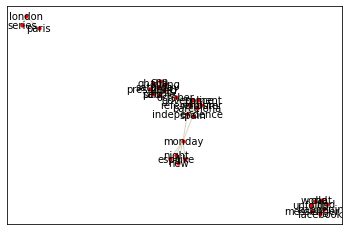

In [ ]:
# First networkx library is imported  
# along with matplotlib 
import networkx as nx 
import matplotlib.pyplot as plt 
   
  
# Defining a Class 
class GraphVisualization: 
   
    def __init__(self): 
          
        # visual is a list which stores all  
        # the set of edges that constitutes a 
        # graph 
        self.visual = [] 
          
    # addEdge function inputs the vertices of an 
    # edge and appends it to the visual list 
    def addEdge(self, a, b): 
        temp = [a, b] 
        self.visual.append(temp) 
          
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self): 
        G = nx.Graph() 
        G.add_edges_from(self.visual) 
        nx.draw_networkx(G, node_size=10,font_size=10, node_color="#f70000", edge_color="#d6d6c2") 
        plt.show() 
  
# Driver code 
G = GraphVisualization() 
for i in random_index:
    G.addEdge(keyword_edges[i][0], keyword_edges[i][1])
G.visualize() 


In [ ]:
len(keyword_edges)

24942

In [ ]:
keyword_clusters[keyword_clusters["cluster"] == "cl_0"]

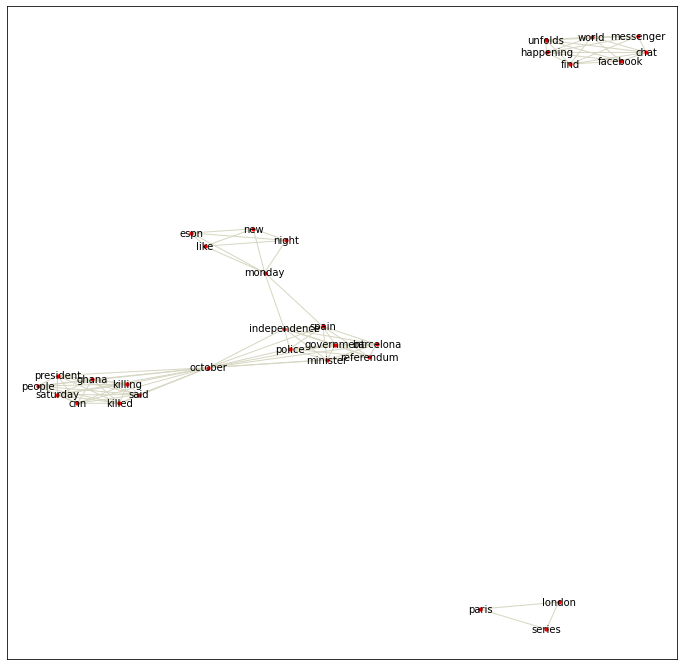

In [ ]:
import matplotlib.pyplot as plt

#G = nx.cycle_graph(80)
#pos = nx.circular_layout(G)

# smaller nodes and fonts
#plt.figure(2)
#nx.draw(G,pos,node_size=60,font_size=8) 

# larger figure size

plt.figure(figsize=(12,12)) 
G.visualize() 
plt.show()
#plt.savefig("one_cool_cluster.png")

In [ ]:
plt.savefig("one_cool_cluster.png")

<Figure size 432x288 with 0 Axes>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=902703f2-430f-48f3-ba3f-6c2fee66cf11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>